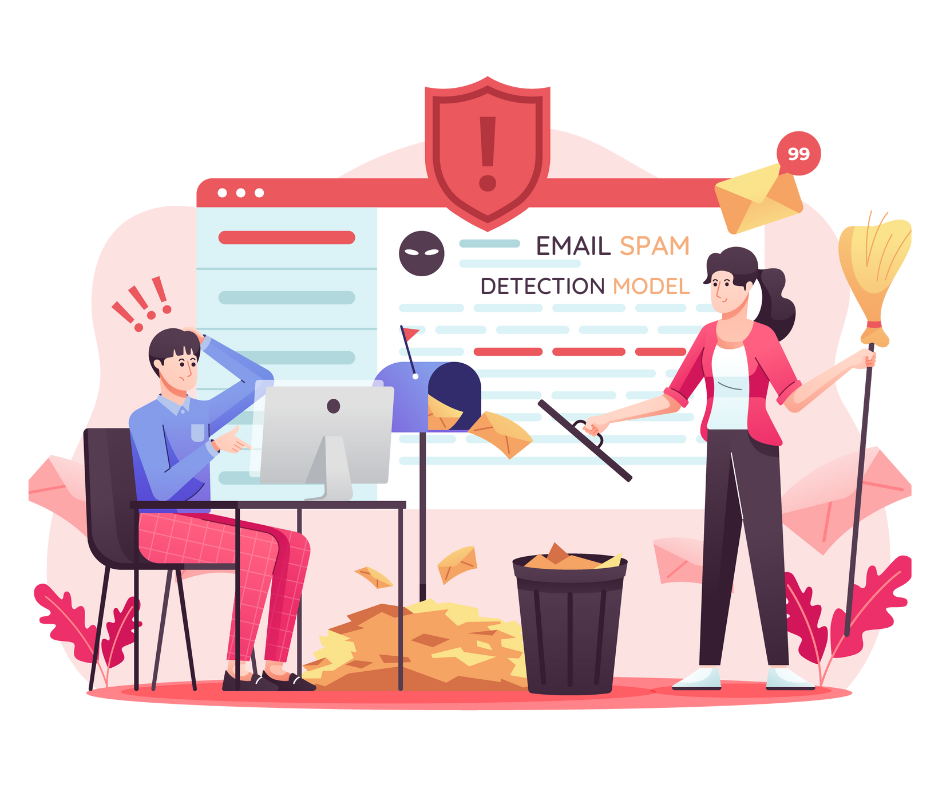

## Import the dataset with required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ed = pd.read_csv('spam.csv',encoding='latin-1')

In [3]:
ed.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
616,ham,He like not v shock leh. Cos telling shuhui is...,NaN,NaN,NaN
1033,ham,"OH MR SHEFFIELD! You wanna play THAT game, oka...",NaN,NaN,NaN
2766,spam,Married local women looking for discreet actio...,NaN,NaN,NaN
4848,ham,either way works for me. I am &lt;#&gt; year...,NaN,NaN,NaN
1093,ham,Well the weather in cali's great. But its comp...,NaN,NaN,NaN


In [4]:
ed.shape

(5572, 5)

In [5]:
ed.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [6]:
ed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


## 1st Step Data Cleaning

In [7]:
#Now drop the unuse column

ed.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [8]:
ed.sample(5)

,v1,v2
4748,ham,Thanx u darlin!im cool thanx. A few bday drink...
5358,ham,Hmm. Shall i bring a bottle of wine to keep us...
3234,ham,"Yes, princess. Toledo."
5096,ham,But i'm really really broke oh. No amount is t...
2543,ham,Package all your programs well


In [9]:
#Now rename the column name

ed.rename(columns={'v1' : 'Catagory','v2' : 'Email Body'},inplace=True)

In [10]:
ed.sample(5)

,Catagory,Email Body
2953,ham,Think i might have to give it a miss. Am teach...
3474,ham,"Night has ended for another day, morning has c..."
965,ham,Or better still can you catch her and let ask ...
2771,ham,Then ur sis how?
567,ham,"So anyways, you can just go to your gym or wha..."


In [11]:
#Now apply the LableEncoder method on ""Catagory"" column

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [12]:
ed['Catagory'] = encoder.fit_transform(ed['Catagory'])

In [13]:
#Here in the Catagory column have two value 1st Ham and 2nd spam.
#So after apply the LabelEncoder method change the vaule from 0 or 1.
#Here Ham=0 and Spam=1

ed.sample(10)

,Catagory,Email Body
1562,0,Dude just saw a parked car with its sunroof po...
3622,0,"Damn, poor zac doesn't stand a chance"
4818,0,Got smaller capacity one? Quite ex...
359,0,"Hello! Just got here, st andrews-boy its a lon..."
735,0,Then why no one talking to me
646,0,Do you mind if I ask what happened? You dont h...
5473,0,Ok lor Ì_ reaching then message me.
3010,0,"Hm good morning, headache anyone? :-)"
2711,0,"Wen ur lovable bcums angry wid u, dnt take it ..."
3621,0,Goin to workout lor... Muz lose e fats...


In [14]:
#Now check duplicate values and removed.

ed.duplicated().sum()

403

In [15]:
ed = ed.drop_duplicates(keep='first')

In [16]:
ed.duplicated().sum()

0

In [17]:
ed.shape

(5169, 2)

## 2nd Step EDA

In [18]:
ed.sample(5)

,Catagory,Email Body
5281,0,"And how you will do that, princess? :)"
2810,0,Thinkin about someone is all good. No drugs fo...
707,0,Quite late lar... Ard 12 anyway i wun b drivin...
813,0,I borrow ur bag ok.
1024,0,Hasn't that been the pattern recently crap wee...


In [19]:
ed['Catagory'].value_counts()

0    4516
1     653
Name: Catagory, dtype: int64

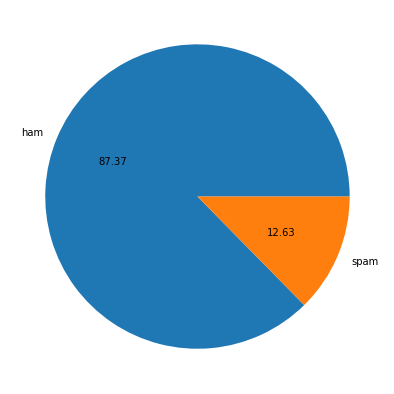

In [20]:
#Now create PieChart for better understanding
fig, ax = plt.subplots(figsize =(10, 7))
colors = ( "orange", "cyan")
plt.pie(ed['Catagory'].value_counts(), labels=['ham','spam'], autopct="%0.2f")
plt.show()

In [21]:
#Now we identifie the data is inbalanced, so we deep drive for EDA with NLTK liberaies.

!pip install nltk

In [22]:
import nltk

In [23]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
#Now we have creat a 3-columns for help of email body.
#Let's see the lenth of email body.

ed['num_chr'] = ed['Email Body'].apply(len)

In [25]:
ed.sample(5)

,Catagory,Email Body,num_chr
3792,0,Hey are you angry with me. Reply me dr.,39
203,0,Goodmorning sleeping ga.,24
819,0,\BOO BABE! U ENJOYIN YOURJOB? U SEEMED 2 B GET...,129
4396,0,When did dad get back.,22
5055,0,Goodnight da thangam I really miss u dear.,42


In [26]:
#We calculate num. of words for each email body with help of NLTK.

ed['num_words'] = ed['Email Body'].apply(lambda x:len(nltk.word_tokenize(x)))

In [27]:
ed.sample(5)

,Catagory,Email Body,num_chr,num_words
819,0,\BOO BABE! U ENJOYIN YOURJOB? U SEEMED 2 B GET...,129,31
5361,0,Yep get with the program. You're slacking.,42,10
3821,0,Just normal only here :),24,6
2905,0,"Helloooo... Wake up..! \Sweet\"" \""morning\"" \""...",125,44
772,0,"idc get over here, you are not weaseling your ...",81,19


In [28]:
#Apply the same rule for calculated sentences.

ed['num_sent'] = ed['Email Body'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [29]:
ed.sample(5)

,Catagory,Email Body,num_chr,num_words,num_sent
2311,1,Congratulations! Thanks to a good friend U hav...,158,32,5
867,1,PRIVATE! Your 2003 Account Statement for 07808...,149,25,3
5123,0,"Hi Chikku, send some nice msgs",30,7,1
2289,1,Had your mobile 11mths ? Update for FREE to Or...,159,27,3
3124,1,1st wk FREE! Gr8 tones str8 2 u each wk. Txt N...,139,32,4


In [30]:
ed[['num_chr','num_words','num_sent']].describe()

,num_chr,num_words,num_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455407,1.961308
std,58.236293,13.322448,1.432583
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [31]:
#Now we describe the catagory based like Ham and spam.

#Ham
ed[ed['Catagory'] == 0][['num_chr','num_words','num_sent']].describe()

,num_chr,num_words,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123339,1.815545
std,56.358207,13.491315,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [32]:
#Spam
ed[ed['Catagory'] == 1][['num_chr','num_words','num_sent']].describe()

,num_chr,num_words,num_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.969372
std,30.137753,7.008418,1.488910
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


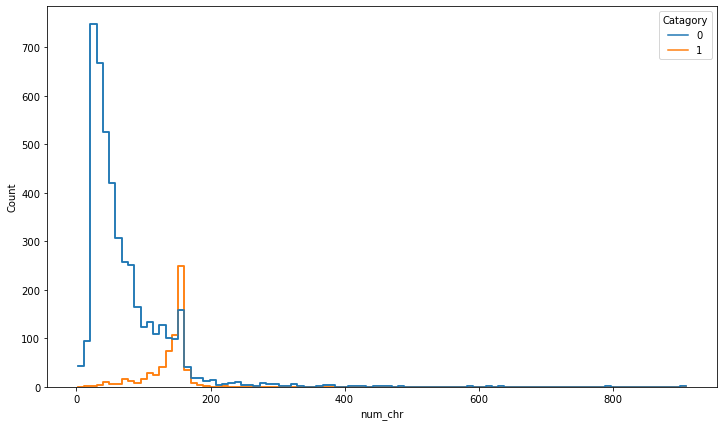

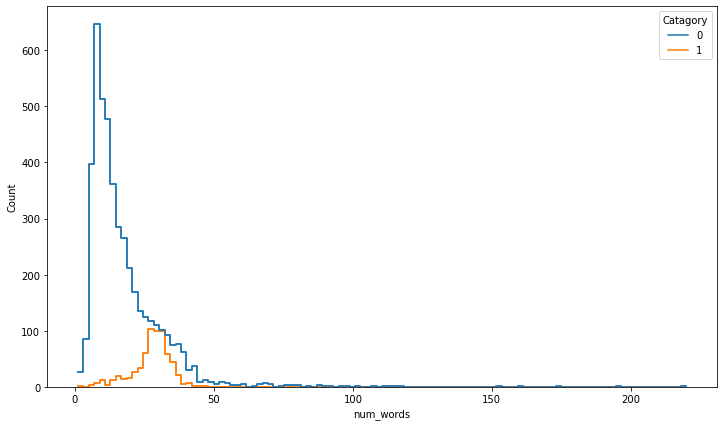

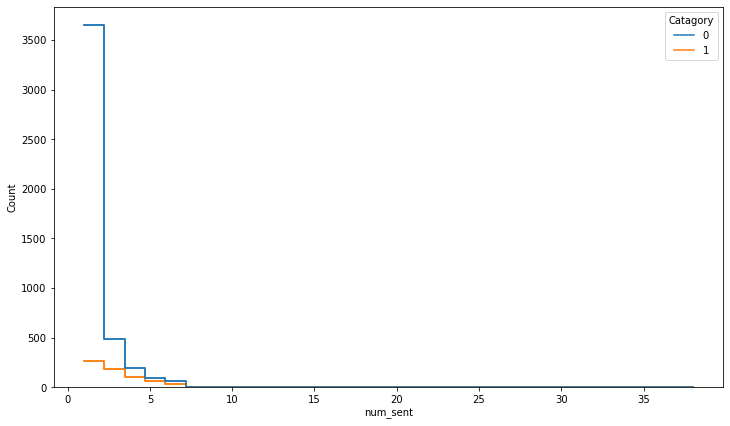

In [33]:
#Create Histogram.

plt.figure(figsize=(12,7))
sns.histplot(data=ed, x="num_chr", hue="Catagory",fill=False, element="step")
sns.histplot(data=ed, x="num_chr", hue="Catagory",fill=False, element="step")
plt.show()

plt.figure(figsize=(12,7))
sns.histplot(data=ed, x="num_words", hue="Catagory",fill=False, element="step")
sns.histplot(data=ed, x="num_words", hue="Catagory",fill=False, element="step")
plt.show()

plt.figure(figsize=(12,7))
sns.histplot(data=ed, x="num_sent", hue="Catagory",fill=False, element="step",bins=30)
sns.histplot(data=ed, x="num_sent", hue="Catagory",fill=False, element="step",bins=30)
plt.show()

<Figure size 864x504 with 0 Axes>

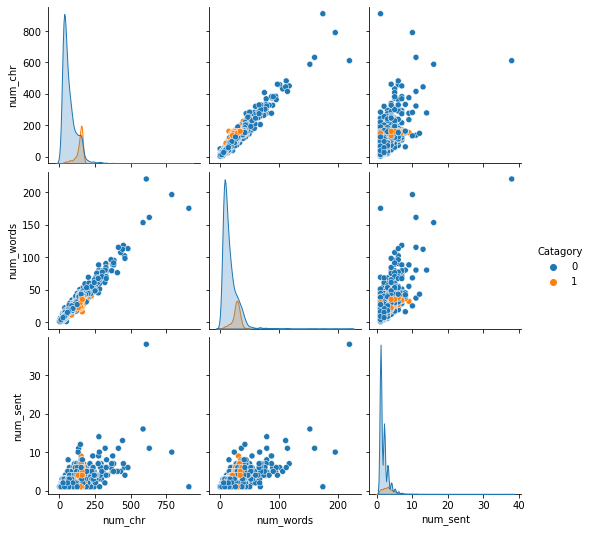

In [34]:
#Creat PaiPlot for define the relationship b/w columns.

plt.figure(figsize=(12,7))
sns.pairplot(ed,hue="Catagory")
plt.show()

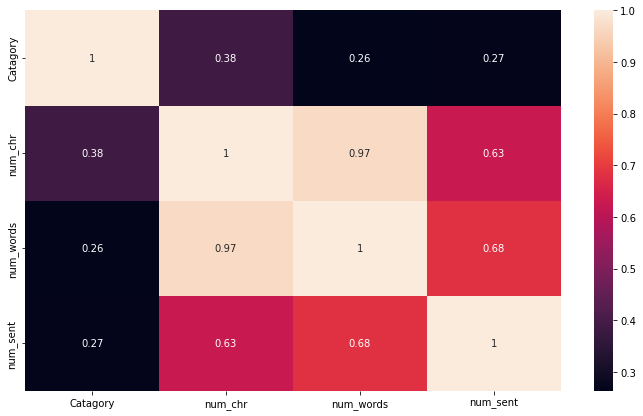

In [35]:
#Corelation heatmap

plt.figure(figsize=(12,7))
sns.heatmap(ed.corr(),annot=True)
plt.show()

## 3rd Step Data Preprocessing

#### FlowChart:

#### 1.Lower Case >>>> 2.Tokenization >>> 3.Removing special charector >>> 4.Removing stop words and punctuations >>> 5.Stemming

In [36]:
def transform_text(text):
#Lowercase    
    text = text.lower()
    
#Tokenization    
    text = nltk.word_tokenize(text)
    
#RemoveSpecialChar    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()
    
#StopWords & Stemming    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
        
    return " ".join(y)      

In [37]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [38]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [39]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [40]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('Loving')

'love'

In [41]:
transform_text('Host-based IDPS for linux systems.')

'idp linux system'

In [42]:
ed['Email Body'][1500]

'Host-based IDPS for linux systems.'

In [43]:
ed['Transform Text'] = ed['Email Body'].apply(transform_text)

In [44]:
ed.sample(5)

,Catagory,Email Body,num_chr,num_words,num_sent,Transform Text
3827,0,Where are you ? What are you doing ? Are yuou ...,139,34,5,yuou work get pc mom find spot would work need
4870,0,Well. You know what i mean. Texting,35,9,3,well know mean text
4137,0,"Good! No, donÛ÷t need any receiptsÛÓwell don...",111,26,4,good need done ye pleas tell number could ring
2546,0,Company is very good.environment is terrific a...,70,13,1,compani terrif food realli nice
3145,0,\SHIT BABE.. THASA BIT MESSED UP.YEH,36,7,1,babe thasa bit mess


### Create WordCloud

In [45]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

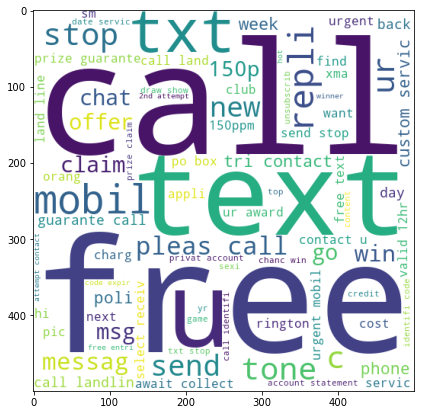

In [46]:
Spam_WC = wc.generate(ed[ed['Catagory'] == 1]['Transform Text'].str.cat(sep=" "))

plt.figure(figsize=(8,7))
plt.imshow(Spam_WC)

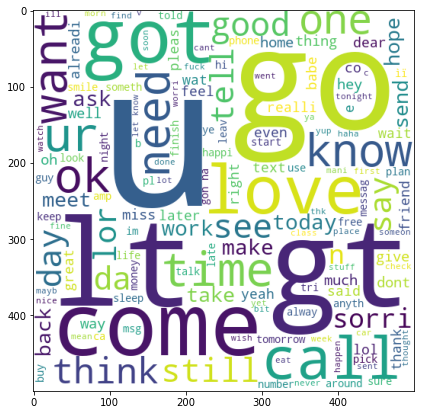

In [47]:
Ham_WC = wc.generate(ed[ed['Catagory'] == 0]['Transform Text'].str.cat(sep=" "))

plt.figure(figsize=(8,7))
plt.imshow(Ham_WC)

### Top 20 words for Spam & Ham massages.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


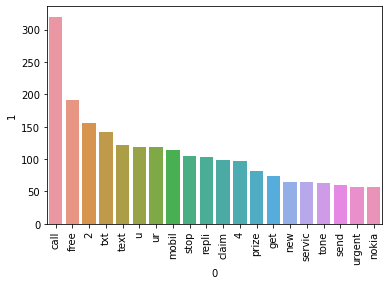

In [48]:
spam_corpus = []
for msg in ed[ed['Catagory'] == 1]['Transform Text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        
len(spam_corpus)

#Viz:

from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(20))[0],pd.DataFrame(Counter(spam_corpus).most_common(20))[1])

plt.xticks(rotation='vertical')
plt.show()

In [49]:
Ham_corpus = []
for msg in ed[ed['Catagory'] == 0]['Transform Text'].tolist():
    for word in msg.split():
        Ham_corpus.append(word)

In [50]:
len(Ham_corpus)

35402

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


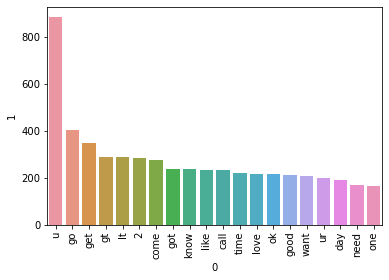

In [51]:
#Viz:

from collections import Counter
sns.barplot(pd.DataFrame(Counter(Ham_corpus).most_common(20))[0],pd.DataFrame(Counter(Ham_corpus).most_common(20))[1])

plt.xticks(rotation='vertical')
plt.show()

## 4th Step Model Building

#### Text vectorization using Bag of words method

In [52]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [53]:
A = cv.fit_transform(ed['Transform Text']).toarray()

In [54]:
#5169=SMS & 6708=Words
A.shape

(5169, 6708)

In [55]:
B = ed['Catagory'].values

In [56]:
B

array([0, 0, 1, ..., 0, 0, 0])

#### Now train test split

In [57]:
from sklearn.model_selection import train_test_split
A_train,A_test,B_train,B_test = train_test_split(A,B,test_size=0.2,random_state=2)

#### Model from CountVectorizer

In [58]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [59]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [60]:
gnb.fit(A_train,B_train)
b_pred1 = gnb.predict(A_test)
print(accuracy_score(B_test,b_pred1))
print(confusion_matrix(B_test,b_pred1))
print(precision_score(B_test,b_pred1))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [61]:
mnb.fit(A_train,B_train)
b_pred2 = mnb.predict(A_test)
print(accuracy_score(B_test,b_pred2))
print(confusion_matrix(B_test,b_pred2))
print(precision_score(B_test,b_pred2))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [62]:
bnb.fit(A_train,B_train)
b_pred3 = bnb.predict(A_test)
print(accuracy_score(B_test,b_pred3))
print(confusion_matrix(B_test,b_pred3))
print(precision_score(B_test,b_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


#### Model from TFIDVectorizer

In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)

In [64]:
A = tfidf.fit_transform(ed['Transform Text']).toarray()

In [65]:
#5169=SMS & 6708=Words
A.shape

(5169, 3000)

In [66]:
B = ed['Catagory'].values

In [67]:
from sklearn.model_selection import train_test_split
A_train,A_test,B_train,B_test = train_test_split(A,B,test_size=0.2,random_state=2)

In [68]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [69]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [70]:
gnb.fit(A_train,B_train)
b_pred1 = gnb.predict(A_test)
print(accuracy_score(B_test,b_pred1))
print(confusion_matrix(B_test,b_pred1))
print(precision_score(B_test,b_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [71]:
mnb.fit(A_train,B_train)
b_pred2 = mnb.predict(A_test)
print(accuracy_score(B_test,b_pred2))
print(confusion_matrix(B_test,b_pred2))
print(precision_score(B_test,b_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [72]:
bnb.fit(A_train,B_train)
b_pred3 = bnb.predict(A_test)
print(accuracy_score(B_test,b_pred3))
print(confusion_matrix(B_test,b_pred3))
print(precision_score(B_test,b_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [73]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))